In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
def pca_map(X, figsize=(10,10), sup="", print_values= False):
    #PCA
    columns=X.columns.values
    pca=PCA(n_components=2)
    pca.fit(X)
    pca_values=pca.components_
    
    #Plot
    plt.figure(figsize=figsize)
    plt.rcParams.update({'font.size': 14}) 
    
    #Plot circle
    x=np.linspace(start=-1,stop=1,num=500)
    y_positive=lambda x: np.sqrt(1-x**2) 
    y_negative=lambda x: -np.sqrt(1-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Plot smaller circle
    x=np.linspace(start=-0.5,stop=0.5,num=500)
    y_positive=lambda x: np.sqrt(0.5**2-x**2) 
    y_negative=lambda x: -np.sqrt(0.5**2-x**2)
    plt.plot(x,list(map(y_positive, x)), color='maroon')
    plt.plot(x,list(map(y_negative, x)),color='maroon')
    
    #Create broken lines
    x=np.linspace(start=-1,stop=1,num=30)
    plt.scatter(x,[0]*len(x), marker='_',color='maroon')
    plt.scatter([0]*len(x), x, marker='|',color='maroon')

    #Define color list
    colors = ['blue', 'red', 'green', 'black', 'purple', 'brown']
    if len(pca_values[0]) > 6:
        colors=colors*(int(len(pca_values[0])/6)+1)

    #Plot arrow
    add_string=""
    for i in range(len(pca_values[0])):
        xi=pca_values[0][i]
        yi=pca_values[1][i]
        plt.arrow(0,0, 
                  dx=xi, dy=yi, 
                  head_width=0.03, head_length=0.03, 
                  color=colors[i], length_includes_head=True)
        if print_values==True:
            add_string=f" ({round(xi,2)} {round(yi,2)})"
        plt.text(pca_values[0, i], 
                 pca_values[1, i] , 
                 s=columns[i] + add_string )

    plt.xlabel(f"Component 1 ({round(pca.explained_variance_ratio_[0]*100,2)}%)")
    plt.ylabel(f"Component 2 ({round(pca.explained_variance_ratio_[1]*100,2)}%)")
    plt.title('Variable factor map (PCA)')
    plt.suptitle(sup, y=1, fontsize=18)
    plt.show()

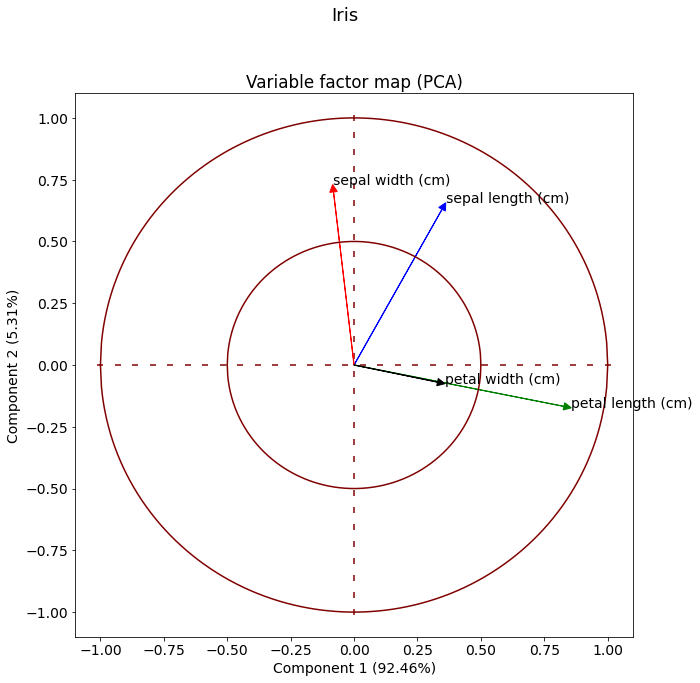

In [220]:
iris = datasets.load_iris()
X=pd.DataFrame(data=iris.data,columns=iris.feature_names)

pca_map(X, figsize=(10,10), sup="Iris")

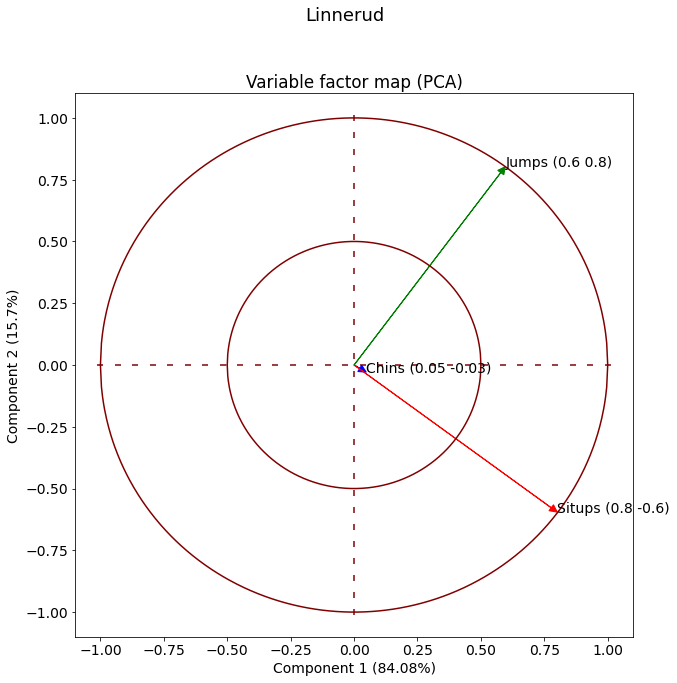

In [221]:
linnerud = datasets.load_linnerud()
X=pd.DataFrame(data=linnerud.data,columns=linnerud.feature_names)

pca_map(X, figsize=(10,10), sup="Linnerud",print_values=True)